In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Simulate a dataset
data = {
    "Ticket_ID": [101, 102, 103, 104, 105, 106, 107, 108],
    "Date_Created": ["2024-01-10 14:23", "2024-02-15 09:45", "NaN", "2024-03-12 16:30", "2024-02-25 11:05", "2024-01-18 08:20", "2024-03-05 20:15", ""],
    "Category": ["Software", "Hardware", "Network", "software", "Cloud", "NaN", "Network", "HardWare"],
    "Priority": ["High", "Medium", "", "Low", "High", "Medium", "Low", "High"],
    "Status": ["Open", "Closed", "Open", "In Progress", "Closed", "", "Open", "Closed"],
    "Resolution_Time": [10, 24, 15, 5, 200, np.nan, 8, 12],
    "Assigned_Tech": ["John", "Mike", "Anna", "Sarah", "Mike", "", "John", "Anna"]
}

In [15]:
df=pd.DataFrame(data)

In [17]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23,Software,High,Open,10.0,John
1,102,2024-02-15 09:45,Hardware,Medium,Closed,24.0,Mike
2,103,NaN,Network,,Open,15.0,Anna
3,104,2024-03-12 16:30,software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20,NaN,Medium,,NaN,
6,107,2024-03-05 20:15,Network,Low,Open,8.0,John
7,108,,HardWare,High,Closed,12.0,Anna


In [19]:
# Convert 'NaN' strings and blanks to proper NaN values
df.replace(["NaN", ""], np.nan, inplace=True)

In [21]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23,Software,High,Open,10.0,John
1,102,2024-02-15 09:45,Hardware,Medium,Closed,24.0,Mike
2,103,NaN,Network,NaN,Open,15.0,Anna
3,104,2024-03-12 16:30,software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20,NaN,Medium,NaN,NaN,NaN
6,107,2024-03-05 20:15,Network,Low,Open,8.0,John
7,108,NaN,HardWare,High,Closed,12.0,Anna


In [23]:
# Convert 'Date_Created' to datetime format
df['Date_Created'] = pd.to_datetime(df['Date_Created'], errors='coerce')


In [25]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.0,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.0,Mike
2,103,NaT,Network,NaN,Open,15.0,Anna
3,104,2024-03-12 16:30:00,software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,NaN,NaN,NaN
6,107,2024-03-05 20:15:00,Network,Low,Open,8.0,John
7,108,NaT,HardWare,High,Closed,12.0,Anna


In [31]:
# find median of missing data
m1=df.Date_Created.median()

In [33]:
#Fill missing dates with the median date
df['Date_Created']=df.Date_Created.fillna(m1)

In [35]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.0,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.0,Mike
2,103,2024-02-20 10:25:00,Network,NaN,Open,15.0,Anna
3,104,2024-03-12 16:30:00,software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,NaN,NaN,NaN
6,107,2024-03-05 20:15:00,Network,Low,Open,8.0,John
7,108,2024-02-20 10:25:00,HardWare,High,Closed,12.0,Anna


In [37]:
# Standardize 'Category' names
df['Category'] = df['Category'].str.strip().str.capitalize()

In [39]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.0,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.0,Mike
2,103,2024-02-20 10:25:00,Network,NaN,Open,15.0,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,NaN,NaN,NaN
6,107,2024-03-05 20:15:00,Network,Low,Open,8.0,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.0,Anna


In [41]:
# Fill missing 'Priority' and 'Status' with 'Unknown'
df[['Priority','Status']]=df[['Priority','Status']].fillna('Unknown')

In [43]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.0,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.0,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.0,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,NaN
6,107,2024-03-05 20:15:00,Network,Low,Open,8.0,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.0,Anna


In [45]:
# Fill missing 'Assigned_Tech' with 'Unassigned'
df['Assigned_Tech']=df.Assigned_Tech.fillna('Unassigned')

In [47]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.0,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.0,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.0,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,Unassigned
6,107,2024-03-05 20:15:00,Network,Low,Open,8.0,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.0,Anna


In [49]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)


In [51]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.0,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.0,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.0,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.0,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,200.0,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,Unassigned
6,107,2024-03-05 20:15:00,Network,Low,Open,8.0,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.0,Anna


In [53]:
# Handle outliers in 'Resolution_Time' (cap at 99th percentile)
outlier_threshold = df['Resolution_Time'].quantile(0.99)
df['Resolution_Time'] = np.where(df['Resolution_Time'] > outlier_threshold, outlier_threshold, df['Resolution_Time'])


In [55]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.00,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.00,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.00,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.00,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,189.44,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,Unassigned
6,107,2024-03-05 20:15:00,Network,Low,Open,8.00,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.00,Anna


In [57]:
df.head()

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.00,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.00,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.00,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.00,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,189.44,Mike


In [59]:
df.tail()

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.00,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,189.44,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,Unassigned
6,107,2024-03-05 20:15:00,Network,Low,Open,8.00,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.00,Anna


In [61]:
df.head()

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.00,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.00,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.00,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.00,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,189.44,Mike


In [65]:
df.isnull().sum()

Ticket_ID          0
Date_Created       0
Category           1
Priority           0
Status             0
Resolution_Time    1
Assigned_Tech      0
dtype: int64

In [83]:
import seaborn as sns
%matplotlib inline


In [85]:
sns.implot(x='Category',y='Priority',data=df)

AttributeError: module 'seaborn' has no attribute 'implot'

In [87]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [88]:
sns.implot(x='Category',y='Priority',data=df)

AttributeError: module 'seaborn' has no attribute 'implot'

In [94]:
sns.implot(x='Ticket_ID',y='Resolution_Time',data=df)

AttributeError: module 'seaborn' has no attribute 'implot'

ValueError: could not convert string to float: 'High'

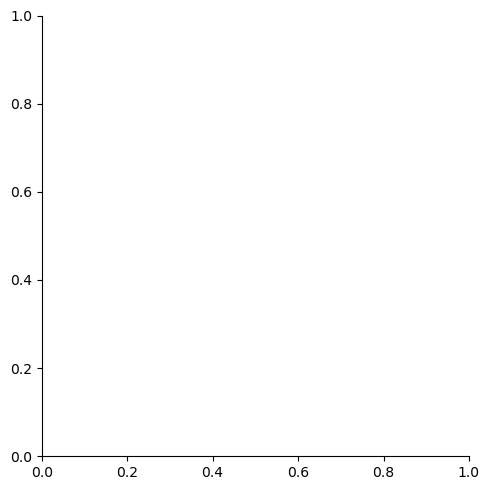

In [96]:
sns.lmplot(x='Resolution_Time', y='Priority', data=df)

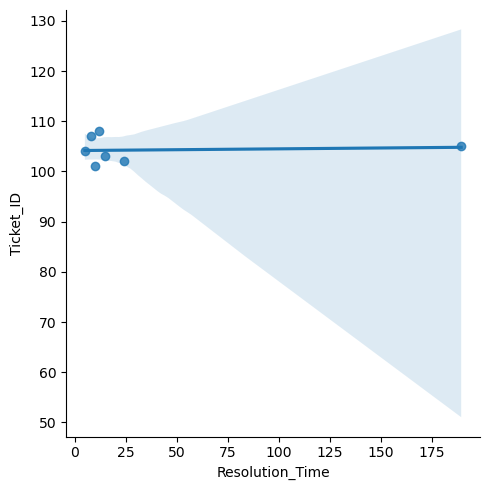

In [102]:
#scatter plot
sns.lmplot(x='Resolution_Time', y='Ticket_ID', data=df)

In [104]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.00,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.00,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.00,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.00,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,189.44,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,Unassigned
6,107,2024-03-05 20:15:00,Network,Low,Open,8.00,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.00,Anna


In [106]:
df

,Ticket_ID,Date_Created,Category,Priority,Status,Resolution_Time,Assigned_Tech
0,101,2024-01-10 14:23:00,Software,High,Open,10.00,John
1,102,2024-02-15 09:45:00,Hardware,Medium,Closed,24.00,Mike
2,103,2024-02-20 10:25:00,Network,Unknown,Open,15.00,Anna
3,104,2024-03-12 16:30:00,Software,Low,In Progress,5.00,Sarah
4,105,2024-02-25 11:05:00,Cloud,High,Closed,189.44,Mike
5,106,2024-01-18 08:20:00,NaN,Medium,Unknown,NaN,Unassigned
6,107,2024-03-05 20:15:00,Network,Low,Open,8.00,John
7,108,2024-02-20 10:25:00,Hardware,High,Closed,12.00,Anna


<Axes: xlabel='Resolution_Time', ylabel='Ticket_ID'>

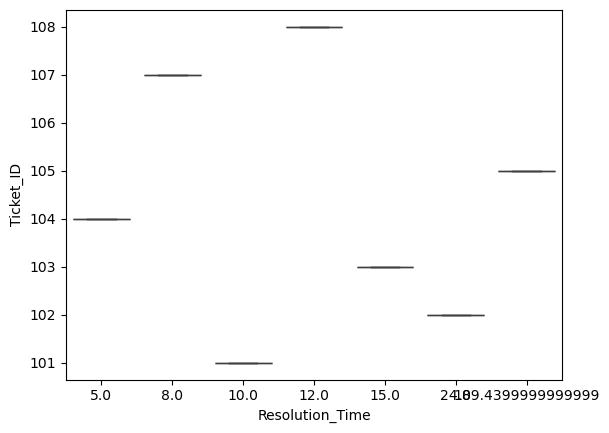

In [108]:
sns.boxplot(x='Resolution_Time', y='Ticket_ID', data=df)

<Axes: ylabel='Category'>

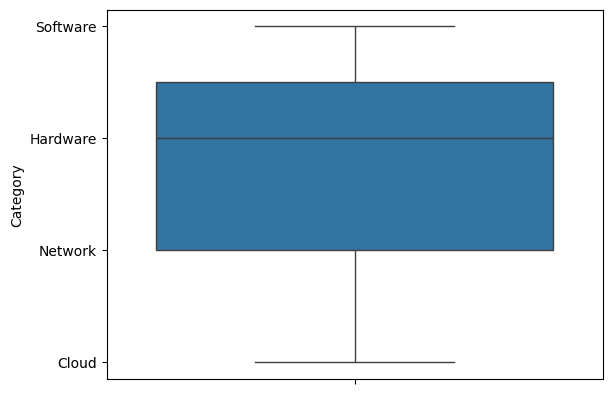

In [112]:
#boxplot
sns.boxplot(data=df.Category)

<Axes: xlabel='Resolution_Time'>

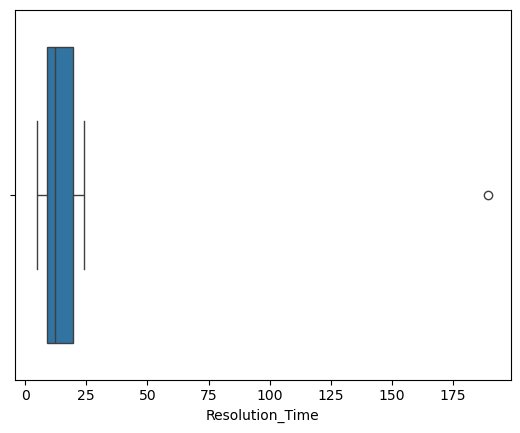

In [116]:
sns.boxplot(x='Resolution_Time', data=df)

<Axes: xlabel='Category', ylabel='count'>

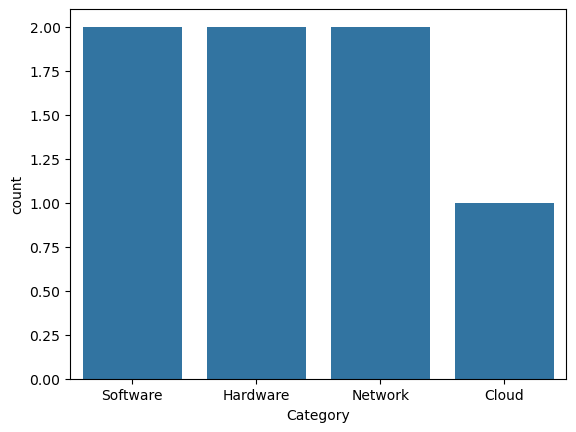

In [118]:
sns.countplot(x='Category', data=df)

In [122]:
import os
os.getcwd()

'C:\\Users\\home'

In [124]:
os.chdir('E:/evarcity/pyhon-cleaning')

In [126]:
os.getcwd()

'E:\\evarcity\\pyhon-cleaning'